<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%99%9C%EC%9A%A9%EB%B2%95/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B0%95%EC%9D%98_6%EA%B0%95_%EB%B3%BC%EB%A6%B0%EC%A0%80_%EB%B0%B4%EB%93%9C_%EC%A7%80%ED%91%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

국내 모 암호화폐 거래소에서 투자자들의 보조지표 이용 패턴을 분석한 결과에 따르면, 기본 보조지표인 이동평균선을 제외하고 가장 많이 설정된 보조지표는 일목균형표, **볼린저 밴드**, 매물대, 상대강도지수, 이동평균 수렴확산 순이라고 합니다.  

볼린저밴드는 주가의 변동이 표준 정규분포를 따른다는 가정에서 주가의 위아래에 밴드를 표시함으로써 주가의 상대적 높낮이를 알려줍니다.  
기술적 분석을 선호하는 투자자들이 주로 사용합니다.  

볼린저 밴드의 개발자인 존 볼린저가 저술한 [볼린저 밴드 투자 기법]에는 존 볼린저가 어떠한 통계학적 기법을 이용해서 볼린저 밴드를 개발했는지, 볼린저 밴드를 다른 지표들과 어떻게 연계해야 최적의 결과를 도출할 수 있는지에 대해 상세히 기록되어져 있습니다.  

이번 강의에서는 **볼린저 밴드의 %b**와 **대역폭**에 대해 알아보고,  
존 볼린저가 제시한 매매 기법을 파이썬으로 구현해봅시다.

#볼린저 밴드 구하기

볼린저 밴드는 주가의 20일 이동 평균선을 기준으로,  
상대적인 고점을 나타내는 **상단 밴드**와 상대적인 저점을 나타내는 **하단 밴드**로 구성됩니다.  

따라서 주가가 **상단 밴드** 근처에 있을수록 상대적인 고점에,  
주가가 **하단 밴드** 근처에 있을수록 상대적인 저점에 있다고 판단할 수 있습니다.  

상단 밴드와 하단 밴드의 사이의 폭은 주가의 표준편차와 특정 상수의 곱으로 나타낼 수 있으며,  

밴드폭이 좁을수록 주가 변동성이 작고,  
밴드폭이 넓을수록 변동성이 크다는 것을 나타냅니다.

**볼린저 밴드 공식**  
* 상단 볼린저 밴드 = 중간 볼린저 밴드 + (2 x 표준편차)  
* 중간 볼린저 밴드 = 종가의 20일 이동평균  
* 하단 볼린저 밴드 = 중간 볼린저 밴드 - (2 x 표준편차)

네이버(035420) 종가 데이터를 이용해서 파이썬으로 직접 볼린저 밴드를 그려봅시다.  

실제로 그래프에서 나타낼 4개 선은 네이버 종가(close), 상단 볼린저 밴드(upper), 중간 볼린저 밴드(MA20), 하단 볼린저 밴드(lower)입니다.

In [1]:
# 파이낸스 데이터리더를 설치
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 파이낸스 데이터리더와 맷플롯립을 임포트
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

In [3]:
# 네이버 데이터에 대해서 2019년 1월 2일부터 현재까지의 데이터를 로드
df = fdr.DataReader('035420', '2019-01-02')
df.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787
2019-01-03,120000,125000,119000,122000,525020,0.033898
2019-01-04,123500,126000,122500,125500,520785,0.028689
2019-01-07,128000,132500,127000,131500,502619,0.047809
2019-01-08,132000,134000,129000,130000,376127,-0.011407
2019-01-09,131000,134500,129500,133000,381372,0.023077
2019-01-10,132000,134500,130000,131000,293112,-0.015038
2019-01-11,133000,134500,130500,131000,322925,0.000000
2019-01-14,130000,130500,125000,127000,525411,-0.030534


In [4]:
len(df)

868

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 868 entries, 2019-01-02 to 2022-07-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    868 non-null    int64  
 1   High    868 non-null    int64  
 2   Low     868 non-null    int64  
 3   Close   868 non-null    int64  
 4   Volume  868 non-null    int64  
 5   Change  868 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 47.5 KB


In [6]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-01,240000,242500,233500,237000,527033,-0.012500
2022-07-04,237500,240000,230500,235000,512776,-0.008439
2022-07-05,238500,248500,237000,243000,654854,0.034043
2022-07-06,240000,249500,236500,243500,875386,0.002058
2022-07-07,246000,249000,243000,245000,545795,0.006160


참고 : 이동 평균(Moving Average, MA)을 구하기 위한 Pandas의 rolling : https://seong6496.tistory.com/102

In [8]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # ① 20일 이동 평균. 중간 볼린저 밴드
df['stddev'] = df['Close'].rolling(window=20).std() # ② 표준편차
df['upper'] = df['MA20'] + (df['stddev'] * 2)   # ③ 상단 볼린저 밴드 (중간 볼린저 밴드 + (2 x 표준편차))
df['lower'] = df['MA20'] - (df['stddev'] * 2)   # ④ 하단 볼린저 밴드 (중간 볼린저 밴드 - (2 x 표준편차))

In [9]:
df[:25]

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787,NaN,NaN,NaN,NaN
2019-01-03,120000,125000,119000,122000,525020,0.033898,NaN,NaN,NaN,NaN
2019-01-04,123500,126000,122500,125500,520785,0.028689,NaN,NaN,NaN,NaN
2019-01-07,128000,132500,127000,131500,502619,0.047809,NaN,NaN,NaN,NaN
2019-01-08,132000,134000,129000,130000,376127,-0.011407,NaN,NaN,NaN,NaN
2019-01-09,131000,134500,129500,133000,381372,0.023077,NaN,NaN,NaN,NaN
2019-01-10,132000,134500,130000,131000,293112,-0.015038,NaN,NaN,NaN,NaN
2019-01-11,133000,134500,130500,131000,322925,0.000000,NaN,NaN,NaN,NaN
2019-01-14,130000,130500,125000,127000,525411,-0.030534,NaN,NaN,NaN,NaN


In [10]:
df.Close[:20].mean()

130425.0

In [11]:
df.Close[1:21].mean()

131325.0

In [16]:
df = df[19:]  # ⑤ 결측값이 없는 데이터만 활용

In [17]:
df.head()

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2019-03-28,122500,123000,120500,122000,449545,-0.008130,130750.0,4612.625694,139975.251387,121524.748613
2019-03-29,121500,124500,121500,124000,421477,0.016393,130300.0,4816.091449,139932.182897,120667.817103
2019-04-01,124000,125500,123500,124000,367014,0.000000,129600.0,4652.673255,138905.346511,120294.653489
2019-04-02,124500,125500,123500,124500,471744,0.004032,129050.0,4567.908654,138185.817309,119914.182691
2019-04-03,123000,123500,121000,122000,958364,-0.020080,128275.0,4369.376085,137013.752169,119536.247831


In [18]:
df.tail()

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower
Date,,,,,,,,,,
2022-07-01,240000,242500,233500,237000,527033,-0.012500,251225.0,17079.901238,285384.802477,217065.197523
2022-07-04,237500,240000,230500,235000,512776,-0.008439,248600.0,15135.006477,278870.012954,218329.987046
2022-07-05,238500,248500,237000,243000,654854,0.034043,246850.0,13490.835096,273831.670191,219868.329809
2022-07-06,240000,249500,236500,243500,875386,0.002058,245125.0,11330.994986,267786.989972,222463.010028
2022-07-07,246000,249000,243000,245000,545795,0.006160,243725.0,9243.027244,262211.054488,225238.945512


① 20개 종가를 이용해서 이동 평균을 구한다.  
② 20개 종가를 이용해서 표준편차를 구한 뒤 stddev 열로 df에 추가한다.  
③ 중간 볼린저 밴드 + (2 x 표준편차)를 상단 볼린저 밴드로 계산한다.  
④ 중간 볼린저 밴드 - (2 x 표준편차)를 하단 볼린저 밴드로 계산한다.  
⑤ ①~④는 19번째 행까지 NaN이므로 값이 있는 20번째 행부터 사용한다.

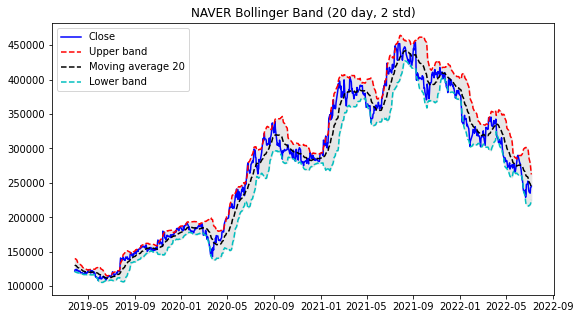

In [19]:
plt.figure(figsize=(9, 5))
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')    # ⑥
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')       # ⑦
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')  # ⑧ 
plt.legend(loc='best')
plt.title('NAVER Bollinger Band (20 day, 2 std)')
plt.show()

⑥ x좌표 df.index에 해당하는 종가를 y좌표로 설정해 파란색(#0000ff) 실선으로 표시한다.  
⑦ x좌표 df.index에 해당하는 상단 볼린저 밴드값을 y좌표로 설정해 빨간 실선(k--)으로 표시한다.  
⑧ 상단 볼린저 밴드와 하단 볼린저 밴드 사이를 회색으로 칠한다.

##볼린저 밴드 지표 1 : %b

참고 : https://namu.wiki/w/%EB%B3%BC%EB%A6%B0%EC%A0%80%20%EB%B0%B4%EB%93%9C

*주가가 볼린저 밴드 어디에 위치하는지를 나타내는 지표가 %b입니다.  *
%b값은 종가가 상단 밴드에 걸쳐 있을 때 1.0이 되고,  
중간에 걸쳐 있을 때 0.5가 되며, 하단에 걸쳐 있을 때 0.0이 됩니다.

종가가 상단 밴드보다 위에 있으면 1.0을 넘게되고 종가가 하단 밴드 아래에 있으면 0보다 작은 수가 됩니다.  

예를 들어 %b가 1.1이라면 주가가 상단 밴드보다 밴드폭의 10%만큼 위에 있다는 의미입니다.

%b 산출 공식은 다음과 같습니다.  

$$\%b = (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드)$$

앞에서 그렸던 볼린저 밴드 차트에 %b를 추가해서 볼린저 밴드의 변화에 따른 %b값 변화를 살펴봅시다.  

%b를 구하려면 기존 코드에서 파이썬 코드 한 줄(아래 코드에서 ①)만 추가하면 됩니다. 나머지는 %b를 그래프로 출력하는 코드입니다.

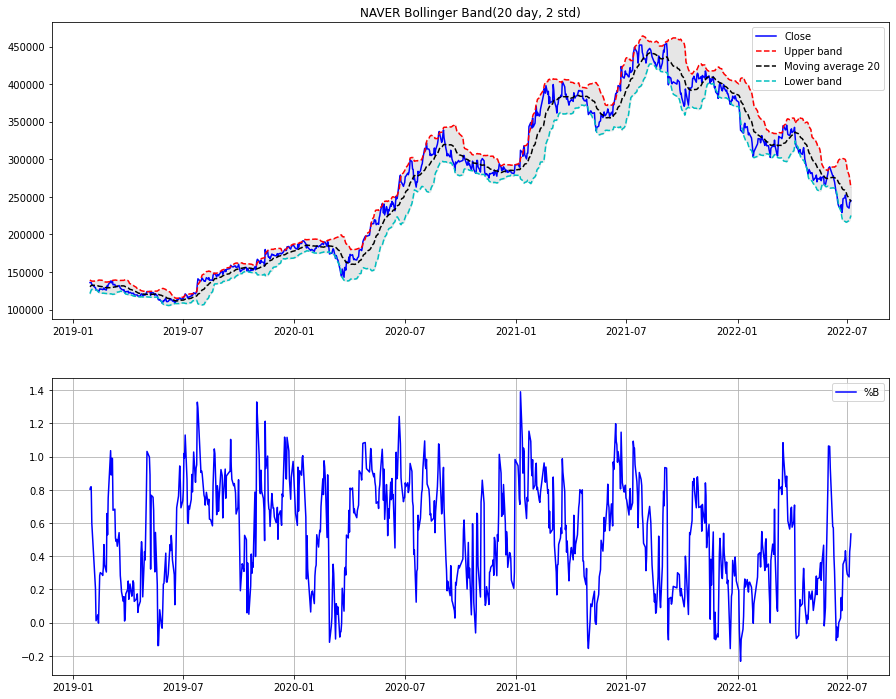

In [20]:
import matplotlib.pyplot as plt

df = fdr.DataReader('035420', '2019-01-02')
  
df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])  # ① 신규 추가 코드
df = df[19:]

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)  # ② 차트를 두 개 그릴건데 그 중 첫번째 차트야 라는 의미.
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③ 차트를 두 개 그릴건데 그 중 두번째 차트야라는 의미.
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④ %b 차트
plt.grid(True)
plt.legend(loc='best')
plt.show()

① (종가-하단 밴드) / (상단 밴드 - 하단 밴드)를 구해서 %B 열을 생성합니다.  
② 기존의 볼린저 밴드 차트를 2행 1열의 그리드에서 1열에 배치합니다.  
③ %B 차트를 2행 1열의 그리드에서 2열에 배치합니다.  
④ x좌표 df.index에 해당하는 %b값을 y좌표로 설정해 파란(b) 실선으로 표시합니다.

%b는 현재 주가가 하단 볼린저 밴드(0), 중간 볼린저 밴드(0.5), 상단 볼린저 밴드(1)를 기준으로 어디쯤에 있는지를 수치로 나타낸 것이므로, 위 그림에서 %b의 그래프는 실제 주가의 흐름과 유사한 모양으로 표시됩니다.

##볼린저 밴드 지표 2 : 밴드폭

밴드폭은 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭을 의미합니다.  

밴드폭은 **스퀴즈**를 확인하는데 유용한 지표입니다.  

 스퀴즈란 변동성이 극히 낮은 수준까지 떨어져서 곧이어 변동성 증가가 발생할 것으로 예상되는 상황을 말합니다.  
 볼린저가 저술한 바에 다르면 밴드폭이 6개월 저점을 기록하는 것으로 보고 스퀴즈를 파악할 수 있다고 합니다.

밴드폭의 산출 공식은 다음과 같습니다.

$$밴드폭 = (상단 볼린저 밴드 - 하단 볼린저 밴드) / 중간 볼린저 밴드$$

밴드폭의 또 다른 중요한 역할은 강력한 추세의 시작과 마지막을 포착하는 것입니다.  
강력한 추세는 스퀴즈로부터 시작되는데 **변동성이 커지면서 밴드폭 수치가 급격히 높아집니다.**  

요약)  
주가의 변동폭이 클 경우 볼린저 밴드의 폭이 넓어지고,  
주가의 변동폭이 적을 때는 볼린저 밴드의 폭 또한 좁아집니다.  
***볼린저 밴드에서 폭이 좁아지는 것 = 주가 안정기***

앞에서 작성했던 볼린저 밴드 %b 코드에서 두 줄(①, ②)만 고쳐보겠습니다.

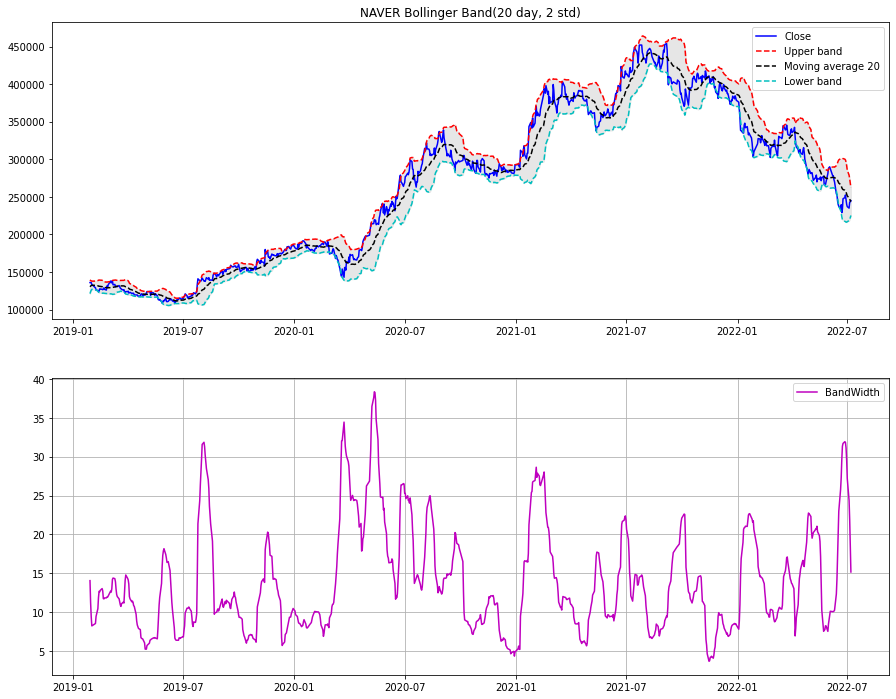

In [22]:
df = fdr.DataReader('035420', '2019-01-02')

df['MA20'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
# df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower']) 기존 코드
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # ①
df = df[19:] #결측값 제거

plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)
# plt.plot(df.index, df['PB'], color='b', label='%B') 기존 코드
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # ② 밴드폭에 대한 차트
plt.grid(True)
plt.legend(loc='best')
plt.show()

① (상단 밴드 - 하단 밴드) / 중간밴드 x 100을 구해 bandwidth(밴드폭) 열을 생성합니다.  
② x좌표 df.index에 해당하는 bandwidth값을 y좌표로 설정해 자홍색(magneta) 실선으로 표시합니다.

밴드폭은 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭을 수치로 나타낸 것이기 때문에, 위 그림에서 상단 볼린저 밴드와 하단 볼린저 밴드 사이가 넓어질 때마다 밴드폭 수치가 높아지는 것을 확인할 수 있습니다.

#볼린저 밴드 매매기법

'상단 밴드에서 매도하고 하단 밴드에서 매수하라'는 볼린저 밴드에 관한 잘못된 통념입니다.  
밴드 태그(주가가 밴드에 닿는 현상)가 일어났다고 해서 그 자체로 매수 신호나 매도 신호가 되는 것은 아닙니다.  

앞에서 살펴본 **%b**는 볼린저 밴드 어디에 주가가   
위치하는지를 나타내며 주가와 연계해 트레이딩 시스템을 구축할 때 필요한 핵심 수단입니다.  

**밴드폭**은 밴드의 너비를 수치로 나타낸 것으로 추세의 시작과 끝을 포착하는 역할을 합니다.  

변동성과 추세는 볼린저 밴드를 구축할 때 이미 반영되었으므로  
변동성과 추세를 주가의 움직임을 확증하는 근거로 삼으면 안 됩니다.  

 **볼린저 밴드와 함께 주로 사용되는 지표는 거래량 지표**들이며 아래 표에서 확인할 수 있습니다.

* 모멘텀 : 변화율, 스토캐스틱  
* 추세 : 선형회귀, MACD  
* 거래량 : 일중강도(II), 매집/분산(A/D), **현금흐름지표(MFI)**, 거래량가중 MACD  
* 과매수/과매도 : CCI, RSI  
* 심리 : 여론조사선, 풋-콜 비율

존 볼린저는 '변동성 돌파', **'추세 추종', '반전'**이라는 세 가지 매매기법을 제시하면서, 독자가 실제로 적용해보고 자신에게 제일 잘 맞는 기법을 사용하라고 말합니다. '변동성 돌파' 매매기법은 주가가 상단 밴드를 상향 돌파할 때 매수하고 주가가 하단 밴드를 하향 이탈할 때 공매도하는 기법인데, 현실적으로 우리나라에서 일반인은 공매도를 하기가 쉽지 않습니다.  

이 강의에서는 '추세 추종'을 다룹니다.

##추세 추종 매매기법



**추세 추종(Trend Follwing)**은 상승 추세에 매수하고 하락 추세에 매도하는 기법입니다. 상승 추세나 하락 추세의 시작을 단순히 %b 지표만 이용해서 주가가 볼린저 상/하단 밴드에 태그했는지 여부로만 판단하지는 않습니다.  

현금흐름지표(MFI)나 일중강도(II)같은 **거래량 관련 지표를 함께 이용해서** 확증이 이루어진 경우에만 매수/매도에 들어갑니다.

여기서는 현금흐름지표(FMI)를 사용합니다.

* 매수 : 주가가 상단 밴드에 접근하며, 지표가 강세를 확증할 때만 매수  
(%b가 0.8보다 크고, MFI가 80보다 클 때)  

* 매도 : 주가가 하단 밴드에 접근하며, 지표가 약세를 확증할 때만 매도  
(%b가 0.2보다 작고, MFI가 20보다 작을 때)

그렇다면 현금흐름지표(FMI)를 이해해야겠지요?

###MFI (현금흐름지표, Money Flow Index) - 거래량 관련 지표

일반적으로 주가를 나타낼 때 종가를 사용하지만,  
중심 가격(Typical Price)을 사용하면 트레이딩이 집중적으로 발생하는 주가 저점을 더 잘 나타낼 수 있습니다.  

**중심 가격(Typical Price)** : 일정 기간의 고가, 저가, 종가를 합한 뒤에 3으로 나눈 것  
**현금 흐름(Money Flow)** : 중심 가격에 거래량을 곱한 것  

MFI는 가격과 거래량을 동시에 분석하므로 상대적으로 다른 지표들보다 신뢰도가 더 높습니다.  

거래량 지표들은 일반적으로 주가에 선행한다는 특징이 있습니다.  

MFI는 상승일 동안의 현금 흐름의 합(긍정적 현금 흐름)과 하락일 동안의 현금 흐름의 합(부정적 현금 흐름)을 이용합니다.

$$MFI = 100 - (100 / (1+긍정적 현금 흐름 / 부정적 현금흐름))$$

* 긍정적 현금 흐름 : 중심 가격이 전일보다 상승한 날들의 현금 흐름의 합  
* 부정적 현금 흐름 : 중심 가격이 전일보다 하락한 날들의 현금 흐름의 합

다음은 10일 기준의 MFI(현금흐름지표)를 구하는 코드입니다.

In [26]:
df = fdr.DataReader('035420', '2019-01-02')

df['MA20'] = df['Close'].rolling(window=20).mean() 
df['stddev'] = df['Close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)

df['PB'] = (df['Close'] - df['lower']) / (df['upper'] - df['lower'])

# 고가, 저가, 종가의 합을 3으로 나눠서 중심 가격 TP(Typical Price)를 구한다.
df['TP'] = (df['High'] + df['Low'] + df['Close']) / 3
df['PMF'] = 0
df['NMF'] = 0

In [27]:
df

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower,PB,TP,PMF,NMF
Date,,,,,,,,,,,,,,
2019-01-02,121000,122000,117000,118000,356120,-0.032787,NaN,NaN,NaN,NaN,NaN,119000.000000,0,0
2019-01-03,120000,125000,119000,122000,525020,0.033898,NaN,NaN,NaN,NaN,NaN,122000.000000,0,0
2019-01-04,123500,126000,122500,125500,520785,0.028689,NaN,NaN,NaN,NaN,NaN,124666.666667,0,0
2019-01-07,128000,132500,127000,131500,502619,0.047809,NaN,NaN,NaN,NaN,NaN,130333.333333,0,0
2019-01-08,132000,134000,129000,130000,376127,-0.011407,NaN,NaN,NaN,NaN,NaN,131000.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,240000,242500,233500,237000,527033,-0.012500,251225.0,17079.901238,285384.802477,217065.197523,0.291787,237666.666667,0,0
2022-07-04,237500,240000,230500,235000,512776,-0.008439,248600.0,15135.006477,278870.012954,218329.987046,0.275355,235166.666667,0,0
2022-07-05,238500,248500,237000,243000,654854,0.034043,246850.0,13490.835096,273831.670191,219868.329809,0.428655,242833.333333,0,0


In [28]:
# range 함수는 마지막 값을 포함하지 않으므로 0부터 종가개수 -2까지 반복할 것이다.
for i in range(len(df.Close)-1):
    # i번째 중심 가격보다 i+1번째 중심 가격이 높으면
    if df.TP.values[i] < df.TP.values[i+1]:
        # i+1번째 중심 가격과 i+1번째 거래량의 곱을
        # i+1번째 긍정적 현금 흐름 PMF(Positive Money Flow)에 저장한다.
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        # i+1번째 부정적 현금 흐름 NMF(Negative Money Flow)값은 0으로 저장한다.
        df.NMF.values[i+1] = 0
    else:
        # 반대의 경우에는 NMF를 계산하고
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        # PFM의 값은 0으로 저장합니다.
        df.PMF.values[i+1] = 0

# 이 시점에서 긍정적 현금 흐름 PMF과 부정적 현금 흐름 열 NMF가 새로 추가되었습니다.
# 하지만 긍정적 현금 흐름과 부정적 현금 흐름을 다 계산한 것은 아닙니다.
# 합을 구해야 하기 때문입니다!

# 10일 동안의 긍정적 현금 흐름의 합을 10일 동안의 부정적 현금 흐름의 합으로 나눈 결과를
# MFR(Money Flow Ratio) 열에 저장한다.
df['MFR'] = (df.PMF.rolling(window=10).sum() /
    df.NMF.rolling(window=10).sum())

# 10일 기준으로 현금 흐름 지수를 계산한 결과를 MFI10(Money Flow Index 10)열에 저장한다.
# MFI = 100 - (100 / (1+긍정적 현금 흐름 / 부정적 현금흐름))
df['MFI10'] = 100 - 100 / (1 + df['MFR'])

In [29]:
df = df[19:]   

In [30]:
df

,Open,High,Low,Close,Volume,Change,MA20,stddev,upper,lower,PB,TP,PMF,NMF,MFR,MFI10
Date,,,,,,,,,,,,,,,,
2019-01-29,129999,136500,129999,136000,411369,0.030303,130425.0,4583.365231,139591.730462,121258.269538,0.804089,134166.333333,55191870377,0,1.119060,52.809272
2019-01-30,139000,139500,133000,136000,462280,0.000000,131325.0,3696.637875,138718.275750,123931.724250,0.816166,136166.666667,62947126666,0,1.232677,55.210709
2019-01-31,138000,143500,136000,136000,1054276,0.000000,132025.0,3118.176761,138261.353523,125788.646477,0.818696,138500.000000,146017226000,0,1.619566,61.825736
2019-02-01,138000,140000,133000,133500,530284,-0.018382,132425.0,2725.488850,137875.977701,126974.022299,0.598606,135500.000000,0,71853482000,1.093327,52.229162
2019-02-07,132000,134000,128500,129000,737938,-0.033708,132300.0,2825.634535,137951.269070,126648.730930,0.208030,130500.000000,0,96300909000,0.980458,49.506628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,240000,242500,233500,237000,527033,-0.012500,251225.0,17079.901238,285384.802477,217065.197523,0.291787,237666.666667,0,125258176333,1.062540,51.516085
2022-07-04,237500,240000,230500,235000,512776,-0.008439,248600.0,15135.006477,278870.012954,218329.987046,0.275355,235166.666667,0,120587822666,1.131132,53.076577
2022-07-05,238500,248500,237000,243000,654854,0.034043,246850.0,13490.835096,273831.670191,219868.329809,0.428655,242833.333333,159020379666,0,1.175682,54.037401


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 849 entries, 2019-01-29 to 2022-07-07
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    849 non-null    int64  
 1   High    849 non-null    int64  
 2   Low     849 non-null    int64  
 3   Close   849 non-null    int64  
 4   Volume  849 non-null    int64  
 5   Change  849 non-null    float64
 6   MA20    849 non-null    float64
 7   stddev  849 non-null    float64
 8   upper   849 non-null    float64
 9   lower   849 non-null    float64
 10  PB      849 non-null    float64
 11  TP      849 non-null    float64
 12  PMF     849 non-null    int64  
 13  NMF     849 non-null    int64  
 14  MFR     849 non-null    float64
 15  MFI10   849 non-null    float64
dtypes: float64(9), int64(7)
memory usage: 112.8 KB


이제 매수 조건과 매도 조건을 걸어서 차트로 시각화해봅시다.

매수 조건은 %b가 0.8보다 크고 MFI가 80보다 클 때로 붉은색 윗방향 삼각형으로 표시했습니다.  
매도 조건은 %b가 0.2보다 작고 MFI가 20보다 작을 때로 파란색 아래방향 삼각형으로 표시했습니다.  

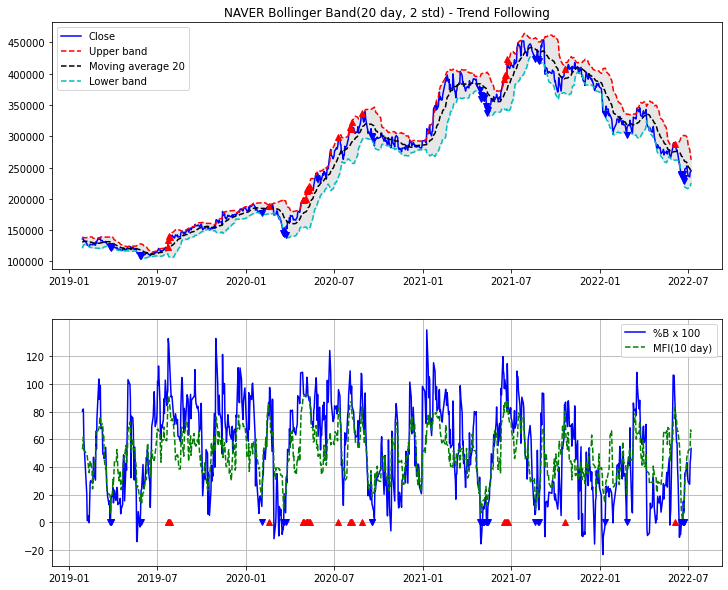

In [33]:
plt.figure(figsize=(12, 10))

# 첫번째 차트 시작
plt.subplot(2, 1, 1)
plt.title('NAVER Bollinger Band(20 day, 2 std) - Trend Following')
plt.plot(df.index, df['Close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')

for i in range(len(df.Close)):
    # %b가 0.8보다 크고 10일 기준 MFI가 80보다 크면
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        # 매수 시점을 나타내기 위해 첫 번째 그래프의 종가 위치에 빨간색 삼각형을 표시합니다.
        plt.plot(df.index.values[i], df.Close.values[i], 'r^')

    # %b가 0.2보다 작고 10일 기준 MFI가 20보다 작으면
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        # 매도 시점을 나타내기 위해 첫 번째 그래프의 종가 위치에 파란색 삼각형을 표시합니다.  
        plt.plot(df.index.values[i], df.Close.values[i], 'bv')
plt.legend(loc='best')


# 두번째 차트 시작
plt.subplot(2, 1, 2)

# MFI와 비교할 수 있게 %b를 그대로 표시하지 않고 100을 곱해서 푸른색 실선으로 표시합니다.  
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100') 

# 10일 기준 MFI(현금흐름지표)를 녹색의 점선으로 표시합니다. 
plt.plot(df.index, df['MFI10'], 'g--', label='MFI(10 day)')

# y축 눈금을 -20부터 120까지 20 단위로 표시합니다.
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, 'r^')
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();

매수 조건은 %b가 0.8보다 크고 MFI가 80보다 클 때로 붉은색 윗방향 삼각형으로 표시했습니다.  
매도 조건은 %b가 0.2보다 작고 MFI가 20보다 작을 때로 파란색 아래방향 삼각형으로 표시했습니다.  

2019년 7월 말에 네이버 종가 123,000원 부근에서 매수 신호 네 개가 연달아 나온 후 이후 2020년 2월까지 매도 신호가 발생하지 않았으므로 2019년 7월 말에 볼린저 밴드의 추세 추종 매수 신호에 따라 매수했다면, 2019년 11월쯤에 중도 매도했다고 하더라도 네이버 종가가 163,000원 정도이므로 대략 32%의 수익이 발생했을 것입니다.  

물론, 2020년 2월쯤에 매도 신호가 발생했으니까 그때 매도했다면 더 높은 수익을 얻을 수가 있을 것입니다.

**참고할만한 요약글**

참고 : https://inforias.com/what-is-a-bollinger-band-for-technical-analysis/

# Quiz

## Quiz #1

종목 삼성전자 데이터의 2020년 1월 1일부터 현재까지의 데이터를 데이터프레임으로 로드한 후에 종가의 20일 이동 평균을 구하고, 'MA20'이라는 새로운 열에 추가하세요. 그 후에 결측값이 존재하는 행을 제거하세요.

In [34]:
import FinanceDataReader as fdr

df = fdr.DataReader('005930', '2020-01-01')

In [38]:
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-07-01,56900,57500,55900,56200,24982097,-0.014035
2022-07-04,56100,57400,55700,57100,17807126,0.016014
2022-07-05,57600,58200,57200,57200,14216539,0.001751


In [39]:
df['MA20'] = df['Close'].rolling(window=20).mean()  # ① 20일 이동 평균. 중간 볼린저 밴드

In [40]:
df

,Open,High,Low,Close,Volume,Change,MA20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN
...,...,...,...,...,...,...,...
2022-07-01,56900,57500,55900,56200,24982097,-0.014035,60600.0
2022-07-04,56100,57400,55700,57100,17807126,0.016014,60115.0
2022-07-05,57600,58200,57200,57200,14216539,0.001751,59700.0


In [41]:
df[19:]

,Open,High,Low,Close,Volume,Change,MA20
Date,,,,,,,
2020-01-31,57800,58400,56400,56400,19749457,-0.013986,58815.0
2020-02-03,55500,57400,55200,57200,23995260,0.014184,58915.0
2020-02-04,57100,59000,56800,58900,21800192,0.029720,59085.0
2020-02-05,60000,60200,58900,59500,19278165,0.010187,59285.0
2020-02-06,60100,61100,59700,61100,14727159,0.026891,59550.0
...,...,...,...,...,...,...,...
2022-07-01,56900,57500,55900,56200,24982097,-0.014035,60600.0
2022-07-04,56100,57400,55700,57100,17807126,0.016014,60115.0
2022-07-05,57600,58200,57200,57200,14216539,0.001751,59700.0


## Quiz #1 풀이

In [ ]:
import FinanceDataReader as fdr

In [ ]:
df = fdr.DataReader('005930', '2020-01-01')
df['MA20'] = df['Close'].rolling(window=20).mean() 

In [ ]:
df

,Open,High,Low,Close,Volume,Change,MA20
Date,,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753,NaN
2020-01-03,56000,56600,54900,55500,15422255,0.005435,NaN
2020-01-06,54900,55600,54600,55500,10278951,0.000000,NaN
2020-01-07,55700,56400,55600,55800,10009778,0.005405,NaN
2020-01-08,56200,57400,55900,56800,23501171,0.017921,NaN
...,...,...,...,...,...,...,...
2021-07-02,80000,80400,79900,80000,8753097,-0.001248,80900.0
2021-07-05,80100,80800,80000,80400,8330969,0.005000,80825.0
2021-07-06,80600,81200,80500,81200,12131651,0.009950,80790.0


In [ ]:
df.isnull().sum()

Open       0
High       0
Low        0
Close      0
Volume     0
Change     0
MA20      19
dtype: int64

In [ ]:
df = df.dropna()
df

,Open,High,Low,Close,Volume,Change,MA20
Date,,,,,,,
2020-01-31,57800,58400,56400,56400,19749457,-0.013986,58815.0
2020-02-03,55500,57400,55200,57200,23995260,0.014184,58915.0
2020-02-04,57100,59000,56800,58900,21800192,0.029720,59085.0
2020-02-05,60000,60200,58900,59500,19278165,0.010187,59285.0
2020-02-06,60100,61100,59700,61100,14727159,0.026891,59550.0
...,...,...,...,...,...,...,...
2021-07-02,80000,80400,79900,80000,8753097,-0.001248,80900.0
2021-07-05,80100,80800,80000,80400,8330969,0.005000,80825.0
2021-07-06,80600,81200,80500,81200,12131651,0.009950,80790.0


In [ ]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
MA20      0
dtype: int64

## Quiz #2

O/X 퀴즈  

주가가 상단 밴드 근처에 있을수록 상대적인 고점에,
주가가 하단 밴드 근처에 있을수록 상대적인 저점에 있다고 판단할 수 있습니다. (O / X)

o

## Quiz #2 풀이

O가 정답입니다.

## Quiz #3

O/X 퀴즈  
변동성 돌파는 주가가 상승할 때 매수하고 하락 추세에서는 매도하는 기법으로 주가가 볼린저 밴드 상단에 접근하고 지표가 강세일 때 매수, 주가가 밴드 하단에 접근하고 지표가 약세일 때 매도 하는 방법입니다.

x

## Quiz #3 풀이

X. 변동성 돌파가 아니라 추세 추종